<a href="https://colab.research.google.com/github/ayobellobia/ayobellobia-colab-git-assignment2-AA/blob/main/Lesson_7_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to rpository -

## **Assignment Supervised machine Learning - Regression**

### **_House Price Prediction Using Bolton Housing Data_**
This dataset provides information about house prices in Bolton. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "Boston Housing Dataset" from sklearn. The regression model will either be a Decision Tree or Random Forest regressor.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (Bolton Housing):

* CRIM: Crime rate by town
* ZN: Proportion of residential land zoned for large lots
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built before 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per `$10,000`
* PTRATIO: Pupil-teacher ratio by town
* B: Proportion of Black population
* LSTAT: Percentage of lower status of the population
* MEDV (Target): Median value of owner-occupied homes in `$1,000s`



**Dataset is from sklearn Datasets**

In [2]:
# ---Task 1: Imports libraries ---
# TODO: Import all the necessary libraries for data handling, visualization, and model building.
# Example: import pandas as pd
# Add your imports here:
#Using assignment 6 dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# ---Task 2: Data Collection and Loading ---
# TODO: Load the 'Boston Housing' dataset from sklearn and convert it into a pandas DataFrame.
# Hint: Use `load_boston()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:

housing = fetch_california_housing()

# Convert to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
# Add the target column
df['Target'] = housing.target

In [4]:
# --- Task 3:Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
print("First Few Rows\n", df.head())

# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:
print("\nData Info:\n")
print(df.info())
print("\nData Descriptive Statistics:")
display(df.describe())

First Few Rows
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Missing Values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


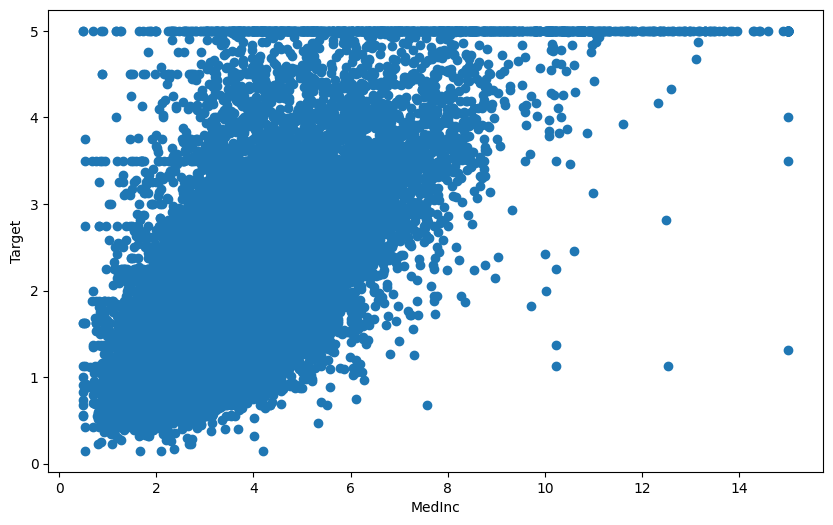

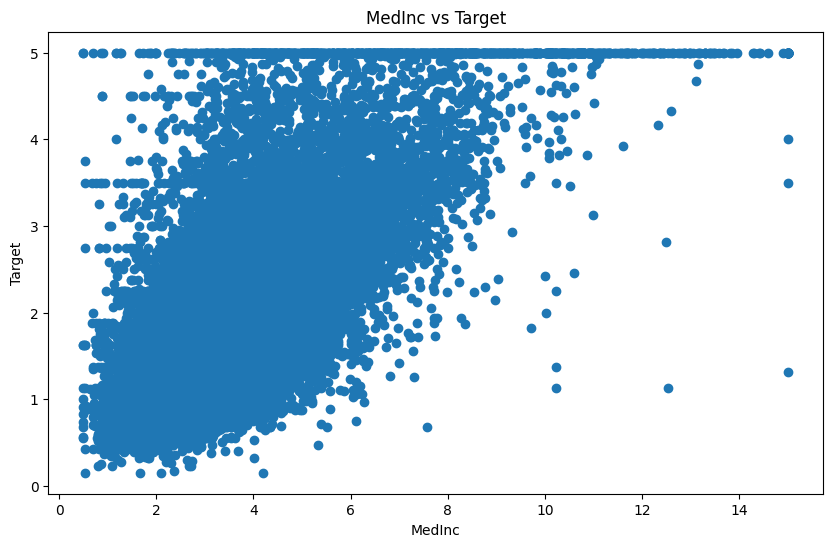

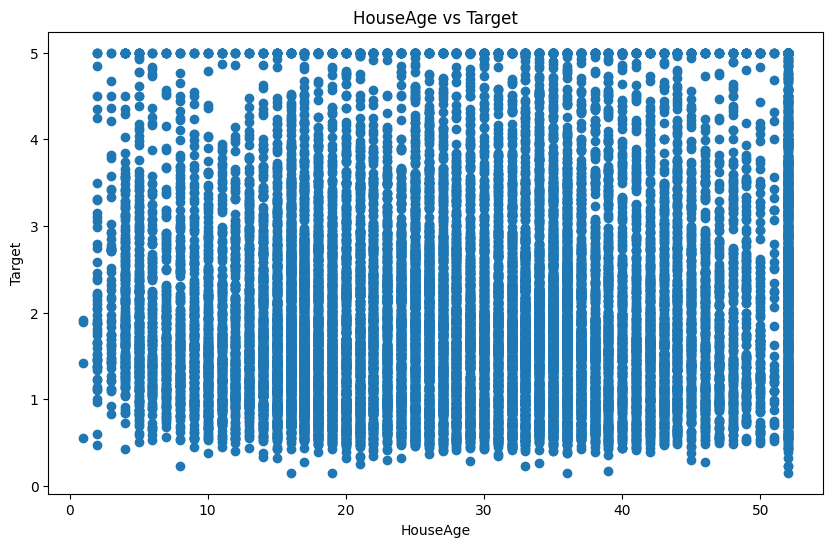

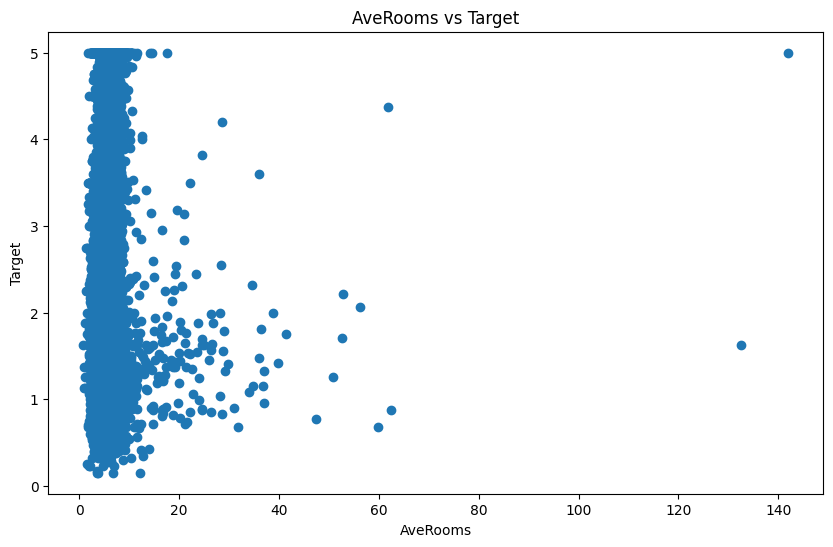

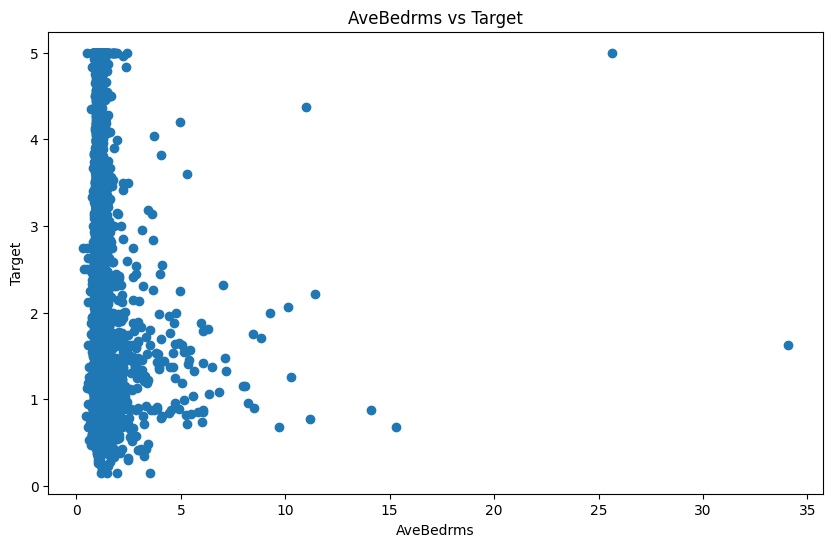

In [5]:
# --- Task 4: EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:

print("Missing Values:\n", df.isnull().sum())

# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable.
# Example: Use `plt.scatter()` to visualize the relationship between features like 'RM' (average number of rooms) and the target ('MEDV').

# Add your code here:
plt.figure(figsize=(10, 6))
plt.scatter(df['MedInc'], df['Target'])
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.show() # Added plt.show() to display the plot

# TODO: Create a function to automate scatter plots for all features vs the target variable.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
def plot_scatter_features_vs_target(dataframe, features, target_col):
    for feature in features:
        plt.figure(figsize=(10, 6))
        plt.scatter(dataframe[feature], dataframe[target_col])
        plt.xlabel(feature)
        plt.ylabel(target_col)
        plt.title(f'{feature} vs {target_col}')
        plt.show()

# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Example: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms'] (Adapted for California Housing)
# Target: 'Target'

# Add your code here:
features_to_plot = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms']
plot_scatter_features_vs_target(df, features_to_plot, 'Target')


In [6]:
# --- Task 5: ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.
from sklearn.tree import DecisionTreeRegressor
# Define X (features) and y (target) and perform the train-test split:
x = df.drop('Target', axis=1)
y = df['Target']
x_train, X_test, y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# TODO: Choose an appropriate regression model: Decision Tree or Random Forest.
# Hint: Use either `DecisionTreeRegressor` or `RandomForestRegressor` from `sklearn.tree` or `sklearn.ensemble`.

# Define your regression model here:
model = DecisionTreeRegressor()

# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
model.fit(x_train, y_train)


DecisionTreeRegressor()

In [7]:
# --- Task 6: Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Perform parameter tuning on the model if needed to improve the performance of your model.

# Add your parameter tuning code here:

# Predict on the test set and calculate the evaluation metrics:
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.51
R-squared: 0.61


In [8]:
# --- Task 7: Model Prediction ---
# TODO: Predict house prices from a new set of feature inputs.
# Example new data: Use hypothetical or randomly generated values for the features.
#
# Example new data: CRIM = 0.2, ZN = 12.5, INDUS = 7.07, CHAS = 0, NOX = 0.5, RM = 6.5, AGE = 68, DIS = 4.0, RAD = 2, TAX = 250, PTRATIO = 17, B = 400, LSTAT = 12

# Add your prediction code here:
# Create new data for prediction (matching California Housing features)
new_data = pd.DataFrame({
    'MedInc': [3.5],
    'HouseAge': [25.0],
    'AveRooms': [5.0],
    'AveBedrms': [1.0],
    'Population': [1500.0],
    'AveOccup': [3.0],
    'Latitude': [34.0],
    'Longitude': [-118.0]
})

# Make a prediction
predicted_price = model.predict(new_data)

print(f"Predicted house price: ${predicted_price[0]*100000:.2f}") # Assuming target is in $100,000s based on California Housing documentation

Predicted house price: $341100.00


This assignment involved building a regression model to predict house prices using the California Housing dataset. Here's a brief insight into the process:

Data Loading and Initial Exploration: We loaded the California Housing dataset, inspected its structure, and checked for missing values.
Exploratory Data Analysis (EDA): We visualized relationships between features like MedInc, HouseAge, AveRooms, and AveBedrms against the target variable (Target) to understand potential correlations.
Model Training: The dataset was split into training and testing sets, and a DecisionTreeRegressor model was chosen and trained on the training data.
Model Evaluation: The model's performance was evaluated using Mean Squared Error (MSE) and R-squared. We achieved an MSE of 0.51 and an R-squared of 0.61, indicating a moderate fit.
Prediction: Finally, the trained model was used to predict house prices for new, hypothetical feature inputs.
